In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = './optiver/data'
files = [f for f in listdir(data_path)]

In [3]:
df_daily = []

for idx, file in enumerate(files):
    df = pd.read_csv(join(data_path, file))
    df_daily.append(df)

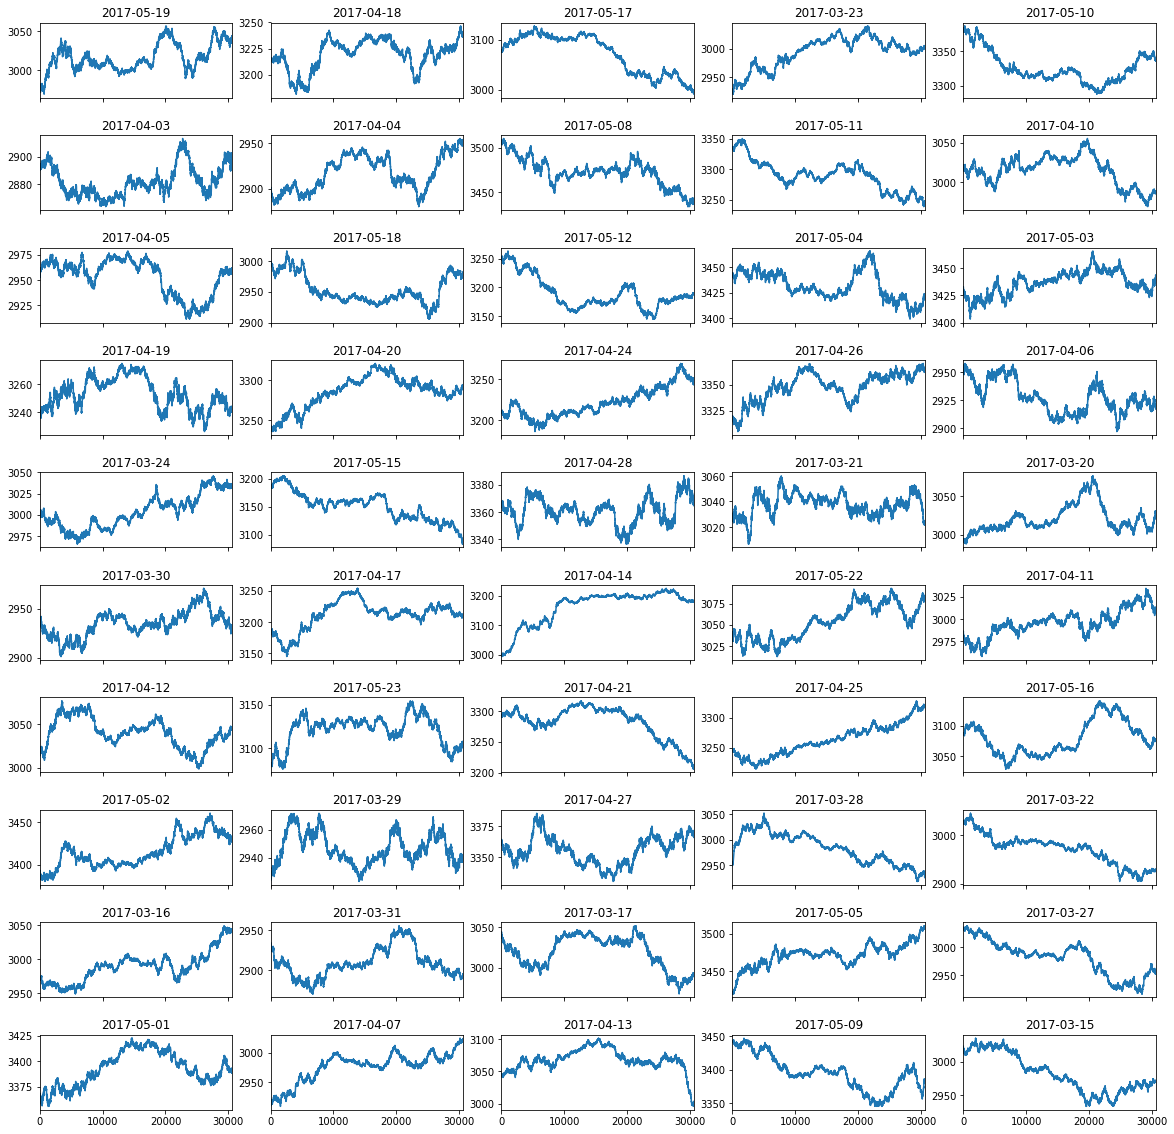

In [7]:
fig, ax_arr = plt.subplots(nrows=10, ncols=5, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for idx, file in enumerate(files):
    df_daily[idx].price.plot(ax=ax_arr[idx // 5, idx % 5], sharex=True)
    ax_arr[idx // 5, idx % 5].set_title(file.split('_')[0])